In [ ]:
import pandas as pd #To read dataset/inputs in to dataframe
import seaborn as sns #To get visual representation of metrics/dataset
import matplotlib.pyplot as plt #To plot a graph
%matplotlib inline
import warnings #To ignore warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import roc_curve, auc#To plot ROC curve
from keras.layers import Dense, InputLayer, Dropout, Flatten, BatchNormalization, Conv1D#For CNN Layers
from keras.layers.pooling import MaxPooling1D#max pooling layer

from unidecode import unidecode #To clean text/data
import re #To clean text/data
from re import sub #To clean text/data


from sklearn.model_selection import train_test_split #Splitting the data

from sklearn.feature_extraction.text import CountVectorizer #For BoW using Countvectorizer

from sklearn.naive_bayes import MultinomialNB #Importing naive bayes model
import numpy as np #For array operations
from sklearn import metrics #For evaluation of metrics
from sklearn.metrics import classification_report,confusion_matrix #Generating classification report
import itertools #Used in Confusion matrix visualization
from sklearn.feature_extraction.text import TfidfVectorizer #For Tfidf model 
from sklearn.svm import LinearSVC #For importing SVM model
from tensorflow.keras.preprocessing.text import Tokenizer  #For Tokenizing
from tensorflow.keras.preprocessing.sequence import pad_sequences  #For sequence padding
import tensorflow as tf #For TensorFlow libraries
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout #LSTM architecture libraries
from tensorflow.keras.models import Sequential     #For the model
import os #For os functionalities
from tensorflow.keras.callbacks import ModelCheckpoint #For write the model
from tensorflow.keras.models import load_model #For loading model

***Visualizations works in colab***

In [ ]:
!pip install unidecode

     |████████████████████████████████| 235 kB 5.1 MB/s eta 0:00:01


***Reading data***

In [ ]:
#Reading the data in csv file in to dataframe
df = pd.read_csv('movie_data.csv')

In [ ]:
#Exploring data
df.head()
#df.shape

,review,sentiment
0,"In 1974, the teenager Martha Moxley (Maggie Gr...",1
1,OK... so... I really like Kris Kristofferson a...,0
2,"***SPOILER*** Do not read this, if you think a...",0
3,hi for all the people who have seen this wonde...,1
4,"I recently bought the DVD, forgetting just how...",0


***Preprocess data***

In [ ]:
#After many data cleaning techniques we merged all our ideas into this function and using unidecode to remove polish letters.
def clean_data(text,remove_polish_letters):
    ''' Pre process and convert texts to a list of words 
    method inspired by method from eliorc github repo: https://github.com/eliorc/Medium/blob/master/MaLSTM.ipynb'''
    text = remove_polish_letters(text)
    text = str(text)
    text = text.lower()

    # Clean the text
    text = sub(r"[^A-Za-z0-9^,!?.\/'+]", " ", text)
    #Removes special characters
    text = sub(r"\+", " plus ", text)
    text = sub(r",", " ", text)
    text = sub(r"\.", " ", text)
    text = sub(r"!", " ! ", text)
    text = sub(r"\?", " ? ", text)
    text = sub(r"'", " ", text)
    #Removes : with and without spaces
    text = sub(r":", " : ", text)
    #Removes matches more than 2 white spaces
    text = sub(r"\s{2,}", " ", text)
    #Removes digits
    text = sub(" \d+", " ", text)

    #text = text.split()

    return text
#Applying clean_data to every review in our dataset
df.review = df.review.apply(lambda x: clean_data(x, unidecode))

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords#Removing stopwords
from nltk.stem.porter import PorterStemmer#For stemming
from nltk.tokenize.toktok import ToktokTokenizer#For Tokenizing
#Tokenization of text
tokenizer=ToktokTokenizer()
#Setting English stopwords
stopword_list=nltk.corpus.stopwords.words('english')

In [ ]:
#Stemming the text
def simple_stemmer(text):
    ps=nltk.porter.PorterStemmer()
    text= ' '.join([ps.stem(word) for word in text.split()])
    return text
#Apply function on review column
df['review']=df['review'].apply(simple_stemmer)


In [ ]:
#set stopwords to english
stop=set(stopwords.words('english'))

#removing the stopwords
def remove_stopwords(text, is_lower_case=False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text
#Apply function on review column
df['review']=df['review'].apply(remove_stopwords)

In [ ]:
df.head()

,review,sentiment
0,teenag martha moxley maggi grace move high cla...,1
1,ok realli like kri kristofferson hi usual easi...,0
2,spoiler read thi think watch movi although wou...,0
3,hi peopl seen thi wonder movi im sure thet wou...,1
4,recent bought dvd forget much hate movi versio...,0


In [ ]:
dfarray = df.values

In [ ]:
text = dfarray[:,0]

In [ ]:
np.array(map(str, text))

array(<map object at 0x7f944bd8df50>, dtype=object)

In [ ]:
text[0:1]

array(['teenag martha moxley maggi grace move high class area bell greenwich connecticut mischief night eve halloween wa murder backyard hous murder remain unsolv twenti two year later writer mark fuhrman christoph meloni former la detect ha fallen disgrac perjuri j simpson trial move idaho decid investig case hi partner stephen week andrew mitchel purpos write book local squirm welcom support retir detect steve carrol robert forster wa charg investig discov crimin net power money cover murder br / br / murder greenwich good tv movi true stori murder fifteen year old girl wa commit wealthi teenag whose mother wa kennedi power rich famili use influenc cover murder twenti year howev snoopi detect convict perjur disgrac wa abl disclos hideou crime wa commit screenplay show investig mark last day martha parallel lack emot dramat vote seven br / br / titl brazil avail'],
      dtype=object)

In [ ]:
from nltk.tokenize.toktok import ToktokTokenizer#For Tokenizing
#Tokenization of text
tokenizer=ToktokTokenizer()

In [ ]:
#tokenizer.tokenize(text)

In [ ]:
text = tokenizer.tokenize(text)

***Visualize preprocessed data***

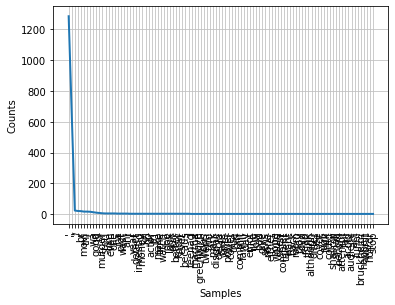

In [ ]:
#tokens = [t for t in text.split()]
#print(tokens)
#Plotting the frequency distribution graphs with the tokens
freq = nltk.FreqDist(text)
freq.plot(100, cumulative=False)

In [ ]:
!pip install bertopic

     |████████████████████████████████| 57 kB 2.6 MB/s 
     |████████████████████████████████| 15.7 MB 10.1 MB/s 
     |████████████████████████████████| 6.4 MB 42.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 78 kB 5.2 MB/s 
     |████████████████████████████████| 86 kB 5.2 MB/s 
     |████████████████████████████████| 13.2 MB 10.0 MB/s 
     |████████████████████████████████| 3.1 MB 56.4 MB/s 
     |████████████████████████████████| 3.3 MB 38.4 MB/s 
     |████████████████████████████████| 1.2 MB 51.2 MB/s 
     |████████████████████████████████| 61 kB 423 kB/s 
     |████████████████████████████████| 636 kB 58.0 MB/s 
     |████████████████████████████████| 895 kB 77.4 MB/s 
     |████████████████████████████████| 1.1 MB 11.4 MB/s 
  Created wheel for hdbscan: filename=hdbscan-0.8.27-cp37-cp37m-linux_x86_64.whl size=2311850 sha256=8f4d5f376388b2430e015cc8f

***Training BERT Model***

In [ ]:
#text[0:90]

In [ ]:
from bertopic import BERTopic

In [ ]:
import numpy as np
import pandas as pd
from copy import deepcopy


In [ ]:
review_list = list(df['review'])

In [ ]:
model = BERTopic(language = 'English')

In [ ]:
#It took nearly an start at 1:30 hours to execute this model
topics, probs = model.fit_transform(review_list)

In [ ]:
model.get_topic_freq()

,Topic,Count
0,-1,33770
1,0,1364
2,1,1111
3,2,661
4,3,613
...,...,...
317,318,10
316,319,10
315,320,10
313,317,10


***Visualizing BERT Topics***

In [ ]:
model.visualize_topics()

In [ ]:
model.save('BERT_model.h5')

In [ ]:
#loaded_model = load_model('BERT_model.h5')

***Creating BERT Model for 20 Topics***

In [ ]:
model2 = BERTopic(nr_topics=20)

In [ ]:
#It took nearly an start at 10:30 hours to execute this model
topics2, probs2 = model2.fit_transform(review_list)

In [ ]:
model2.get_topic_freq()

,Topic,Count
0,-1,32419
1,0,4754
2,1,1144
3,2,1100
4,3,920
5,4,862
6,5,836
7,6,710
8,7,704
9,8,699


In [ ]:
model2.visualize_topics()

In [ ]:
model2.save('BERT_model20.h5')